In [1]:
pip install diagrams

Note: you may need to restart the kernel to use updated packages.


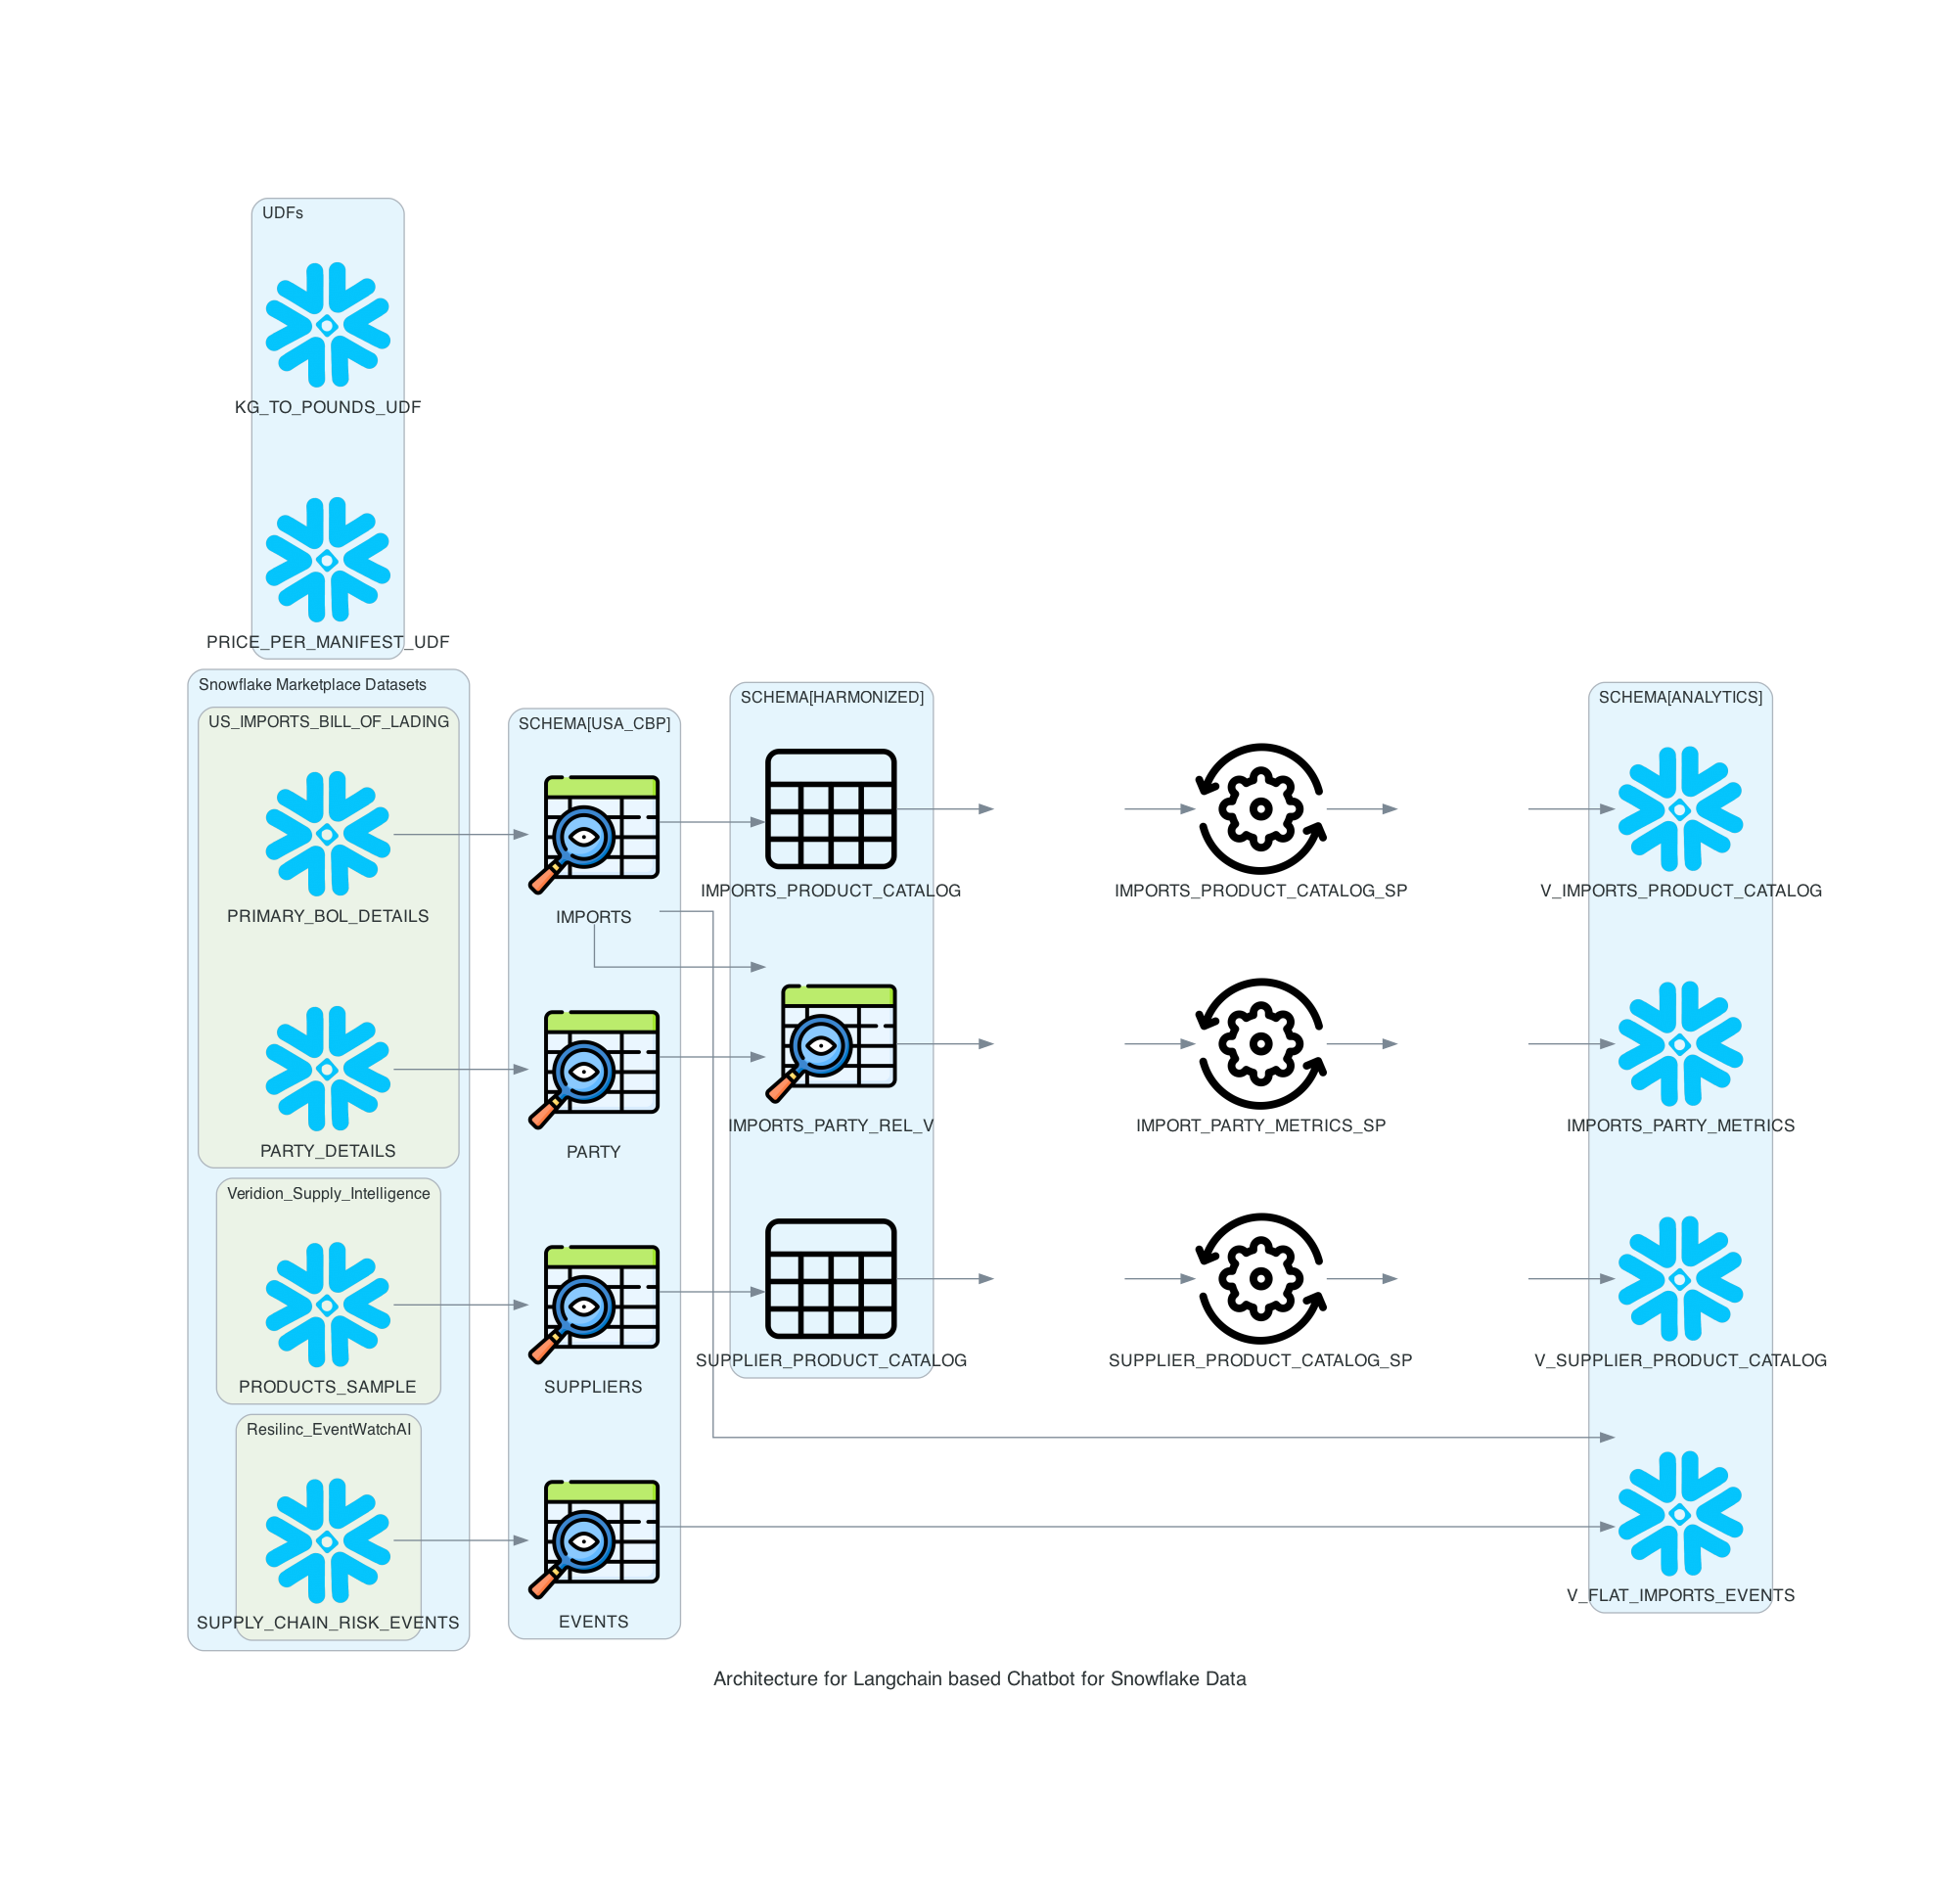

In [5]:
from diagrams import Diagram, Cluster, Edge, Node
from diagrams.custom import Custom
from diagrams.gcp.storage import GCS
from diagrams.azure.database import SQLDatabases
from diagrams.onprem.compute import Server
from diagrams.onprem.network import Internet
from diagrams.programming.language import Python
from diagrams.programming.framework import FastAPI
from diagrams.saas.analytics import Snowflake
from diagrams.programming.flowchart import Action
from diagrams.generic.blank import Blank

with Diagram("Architecture for Langchain based Chatbot for Snowflake Data", show=False, direction="LR", outformat="png") as diagram:

    #Snowflake Marketplace Datasets
    with Cluster("Snowflake Marketplace Datasets"):
      # US_IMPORTS_BILL_OF_LADING Cluster
      with Cluster("US_IMPORTS_BILL_OF_LADING"):
        dataset_imports = Snowflake('PRIMARY_BOL_DETAILS')
        dataset_party = Snowflake('PARTY_DETAILS')

      # Veridion: Supply Intelligence Product Catalogs Cluster
      with Cluster("Veridion_Supply_Intelligence"):
        dataset_products = Snowflake('PRODUCTS_SAMPLE')

      # Resilinc: EventWatch AI Supply Chain events
      with Cluster("Resilinc_EventWatchAI"):
        dataset_events = Snowflake('SUPPLY_CHAIN_RISK_EVENTS')

    # USA_CBP Schema
    with Cluster("SCHEMA[USA_CBP]"):

      imports = Custom('IMPORTS', './images/view.png')
      party = Custom('PARTY', './images/view.png')
      suppliers = Custom('SUPPLIERS', './images/view.png')
      events = Custom('EVENTS', './images/view.png')

    dataset_imports >> imports
    dataset_party >> party
    dataset_products >> suppliers
    dataset_events >> events

    # Harmonized Schema
    with Cluster("SCHEMA[HARMONIZED]"):
      imports_party_rel_v = Custom('IMPORTS_PARTY_REL_V', './images/view.png')
      imports_product_catalog = Custom('IMPORTS_PRODUCT_CATALOG', './images/tables.png')
      supplier_product_catalog = Custom('SUPPLIER_PRODUCT_CATALOG', './images/tables.png')


    [imports, party] >> imports_party_rel_v
    [imports] >> imports_product_catalog
    [suppliers] >> supplier_product_catalog

    
    #Analytics Schema
    with Cluster("SCHEMA[ANALYTICS]"):
        imports_party_metrics = Snowflake('IMPORTS_PARTY_METRICS')
        v_flat_imports_events = Snowflake('V_FLAT_IMPORTS_EVENTS')
        v_imports_product_catalog = Snowflake('V_IMPORTS_PRODUCT_CATALOG')
        v_supplier_product_catalog = Snowflake('V_SUPPLIER_PRODUCT_CATALOG')



    [imports_party_rel_v] >> Blank() >> Custom('IMPORT_PARTY_METRICS_SP', './images/procedure.png') >> Blank() >>  imports_party_metrics
    [imports, events] >> v_flat_imports_events
    [imports_product_catalog] >> Blank() >>  Custom('IMPORTS_PRODUCT_CATALOG_SP', './images/procedure.png') >> Blank() >>  v_imports_product_catalog
    [supplier_product_catalog] >> Blank() >> Custom('SUPPLIER_PRODUCT_CATALOG_SP', './images/procedure.png') >> Blank() >>  v_supplier_product_catalog


    with Cluster("UDFs"):
      udf1 = Snowflake('KG_TO_POUNDS_UDF')
      udf2 = Snowflake('PRICE_PER_MANIFEST_UDF')
    
diagram